In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from keras.utils import np_utils

Using TensorFlow backend.


## Load data

In [2]:
data_wine = datasets.load_wine()

# Transformation du dataset en pandas dataframe
data_wine = pd.DataFrame(data= np.c_[data_wine['data'], data_wine['target']],
                     columns= data_wine['feature_names'] + ['target'])
# Affichage du dataset
data_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


## Data exploration

In [3]:
data_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.5 KB


In [ ]:
data_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

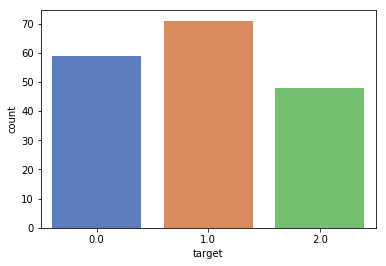

In [ ]:
sns.countplot(data_wine['target'], palette = 'muted');

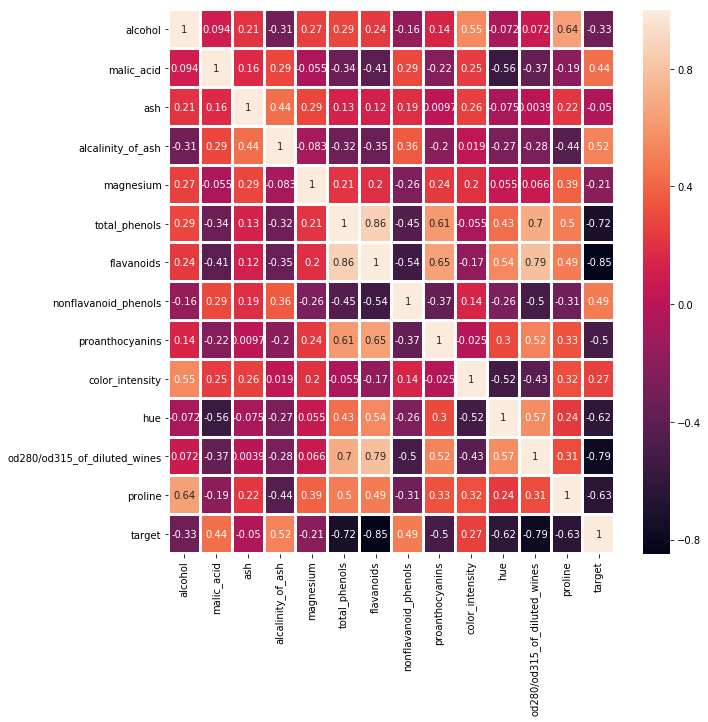

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_wine.corr(), annot=True, linewidths=2)

/home/fsz/Environnements/learning/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


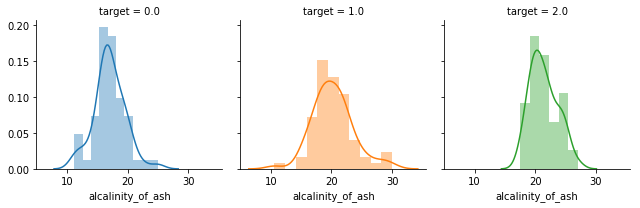

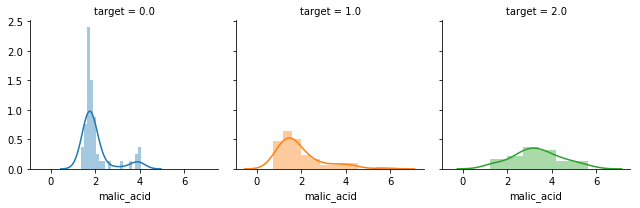

In [ ]:
# Alcalinity distribution
g = sns.FacetGrid(data_wine, col='target', hue='target')
g.map(sns.distplot, 'alcalinity_of_ash')

# Macid alic distribution
g = sns.FacetGrid(data_wine, col='target', hue='target')
g.map(sns.distplot, 'malic_acid')

In [ ]:
plt.figure(figsize=(16,15))
sns.pairplot(data_wine)

<Figure size 1152x1080 with 0 Axes>

## Split data

In [ ]:
X = data_wine.drop('target', axis=1)
y = data_wine['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

## Hyperparameter tuning

In [ ]:
# Parametres a tester
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [0.0001, 0.001, 0.01],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# Metrics to test
scores = ['f1','precision', 'recall']


for score in scores:
    print("# Hyperpameters tuning for %s \n" % score)

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print('Best parameters:', clf.best_params_, '\n')
    print("Grid scores:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) pour %r"
              % (mean, std * 2, params))
    print()


y_pred = clf.predict(X_test)    
print('Classification report: \n',classification_report(y_test, y_pred))

## Visualize features importance

In [ ]:
df = pd.DataFrame(clf.best_estimator_.coef_[1].ravel(), X.columns).reset_index()
df = df.rename(columns={'index':'features',0:'coef'})
df = df.sort_values(by='coef')

plt.title('Feature importance')
sns.barplot(x='coef', y='features',data=df)    